# 실시간

In [ ]:
# 참고 사이트

## 수집 파트
# https://tariat.tistory.com/892?category=678887    실시간 데이터 수집 // urllib모듈을 이용
# https://kyle79.tistory.com/52       스파크 스트리밍
# https://stackoverrun.com/ko/q/6062203     실시간 아두이노 데이터 판단 (심전도)
# https://blog.naver.com/gys24/221503031547 심전도 데이터


# 아두이노와 파이썬 연결 // 이거 너무 어렵잖아!
# https://blog.naver.com/jdkim2004/222121948180
# https://python-arduino-serial.readthedocs.io/en/latest/
# http://egloos.zum.com/sman944/v/3090977

# 라즈베리파이 연결
# https://blog.naver.com/zeta0807/222144886241


## 그래프 파트
# https://lovit.github.io/visualization/2019/11/22/seaborn_tutorial/     단순설명
# https://www.delftstack.com/ko/howto/matplotlib/how-to-plot-in-real-time-using-matplotlib/
# https://muzukphysics.tistory.com/301 # 이게 그나마 현실적?
# https://cafe.naver.com/carroty/345147 # 이건 주호한테 물어봐야 함
# https://www.crocus.co.kr/1398  // 이건 데이터를 주호한테 받고 나서 시도해보자


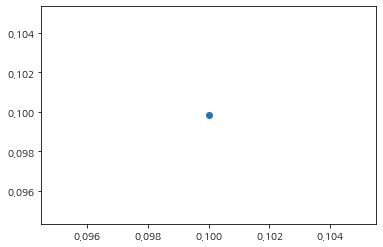

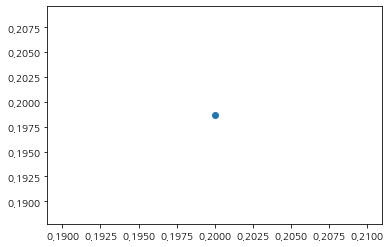

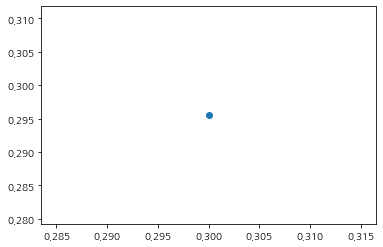

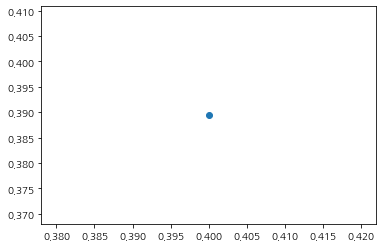

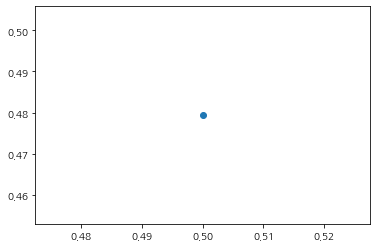

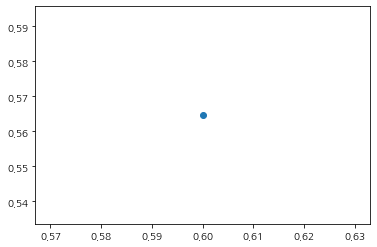

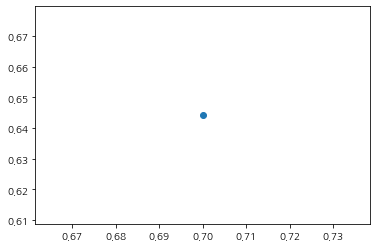

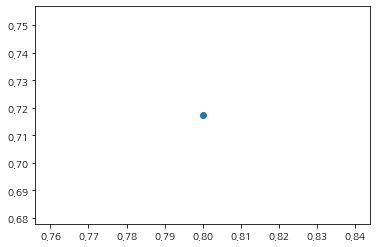

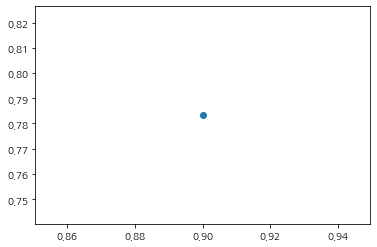

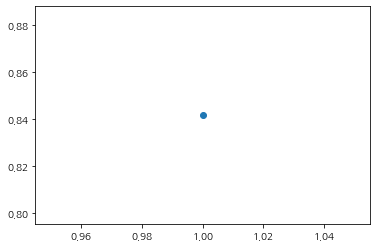

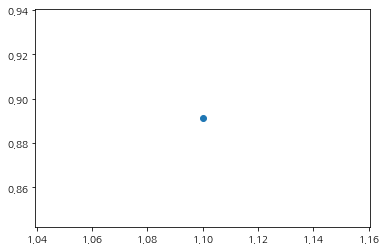

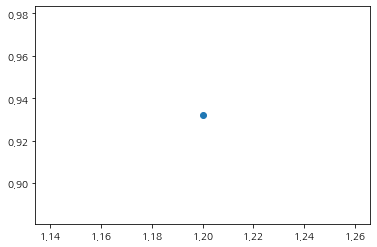

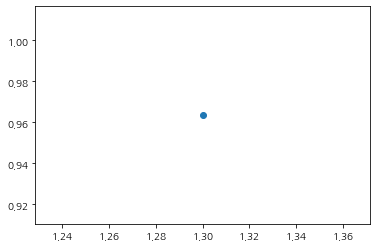

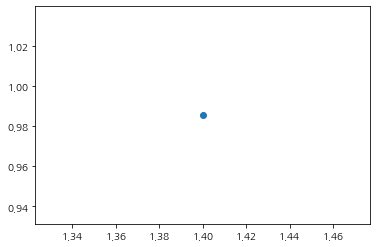

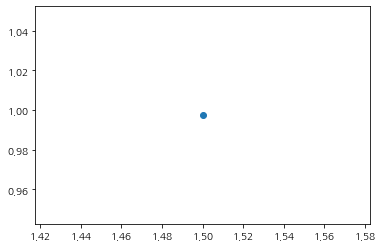

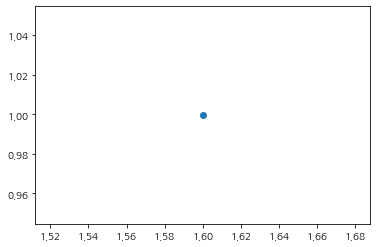

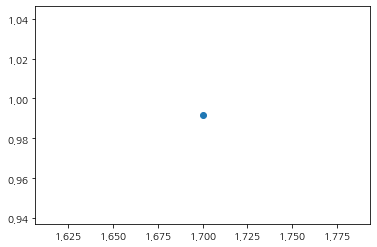

KeyboardInterrupt: 

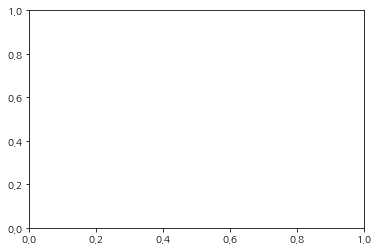

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 파이썬 실시간 그래프 그리기
x = 0
for i in range(1000):
    x = x + 0.1
    y = np.sin(x)

    plt.scatter(x,y)
    plt.pause(0.001)

plt.show()

In [ ]:
# 여기서부터는 다른 블로그 내용

In [ ]:
# matplotlib.animation.FuncAnimation(fig, 
#                                    func, 
#                                    frames=None,
#                                    init_func=None, 
#                                    fargs=None,
#                                    save_count=None, 
#                                    *, 
#                                    cache_frame_data=True,
#                                    **kwargs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings("ignore")

x = []
y = []

figure, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, y)
plt.axis([0, 4*np.pi, -1, 1])

def func_animate(i):
    x = np.linspace(0, 4*np.pi, 1000)
    y = np.sin(2 * (x - 0.1 * i))
    
    line.set_data(x, y)
    
    return line,

ani = FuncAnimation(figure,
                    func_animate,
                    frames=10,
                    interval=50)

ani.save(r'animation.gif', fps=10)

plt.show()

In [ ]:
# 아니 도대체 왜 따로 출력이 되는거야

import numpy as np
import matplotlib.pyplot as plt
x=0
for i in range(100):
    x=x+0.04
    y = np.sin(x)
    plt.scatter(x, y)
    plt.title("Real Time plot")
    plt.xlabel("x")
    plt.ylabel("sinx")
    plt.pause(0.05)

plt.show()

# 여기는 아두이노 데이터를 받아다 실시간으로 처리하는 코드

In [ ]:
# 심전도 데이터 판단

from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg
import matplotlib.figure as mfig
import PyQt4.QtGui as gui, PyQt4.QtCore as core
import collections
import time
import random

import serial
ser = serial.Serial('/dev/tty.usbmodem1411', 57600)

start_byte = 'S'
end_byte = 'F'


refreshMillis = 50
N = 200
xs = collections.deque(maxlen=N)
ys = collections.deque(maxlen=N)

app = gui.QApplication([])

fig = mfig.Figure()
canvas = FigureCanvasQTAgg(fig)

ax = fig.add_subplot(111)
ax.set_ylim([0,5])
line2D, = ax.plot(xs,ys)
canvas.show()

def process_line():

       line = ser.readline()
       data = map(float,line.split(" "))
       xs.append(data[0])
       ys.append(data[1])
       line2D.set_data(xs,ys)
       print data
       xmin, xmax = min(xs),max(xs)
       if xmin == xmax:
           ax.set_xlim([xmin,xmin+1])
       else:
           ax.set_xlim([xmin,xmax])
       canvas.draw()

timer = core.QTimer()
timer.timeout.connect(process_line)
timer.start(refreshMillis)

app.exec_()

ser.flush()
ser.close()

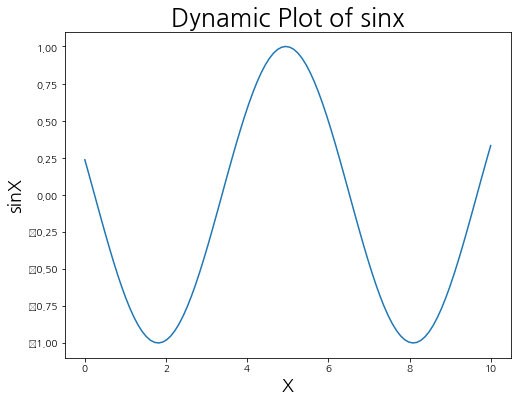

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.cos(x)

plt.ion()

figure, ax = plt.subplots(figsize=(8,6))
line1, = ax.plot(x, y)

plt.title("Dynamic Plot of sinx",fontsize=25)

plt.xlabel("X",fontsize=18)
plt.ylabel("sinX",fontsize=18)

for p in range(100):
    updated_y = np.cos(x-0.05*p)
    
    line1.set_xdata(x)
    line1.set_ydata(updated_y)
    
    figure.canvas.draw()
    
    figure.canvas.flush_events()
    time.sleep(0.1)